In [1]:
from supervised_utils import *

In [2]:
# sopprimi i warning a runtime
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Task di regressione su `score`

#### Sul dataset iniziale `movies_adj_last30.csv`

In [3]:
df = pd.read_csv("../data/movies_adj_last30.csv")
print_info(df)

# cols: 14 | # rows: 4046

+----------+---------+
|  Column  |  Type   |
+----------+---------+
|    id    |  int64  |
|  title   | object  |
|  rating  | object  |
|  genre   | object  |
|   year   |  int64  |
|  score   | float64 |
|  votes   | float64 |
| director | object  |
|   star   | object  |
| country  | object  |
|  budget  | float64 |
|  gross   | float64 |
| company  | object  |
| runtime  | float64 |
+----------+---------+


In [4]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title", "company", "country", "director", "star"],
    "dummies": ["rating", "genre"],
    "labels": [],
    "standardize": ["runtime"],
    "minmax": ["votes", "budget", "gross"]
}

\
/

TUNING & TRAINING <Ridge Regressor>...

Results after GridSearchCV:
Best parameters: {'alpha': 0.5}
Best score: {'mean_squared_error': 0.5192}

> TESTING...
MAE: 0.5527
MSE: 0.5772

\
/

TUNING & TRAINING <Decision Tree Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best score: {'mean_squared_error': 0.5053}

Results after max_depth tuning:
Best parameters: {'max_depth': 10}
Best score: {'mean_squared_error': 0.5054}



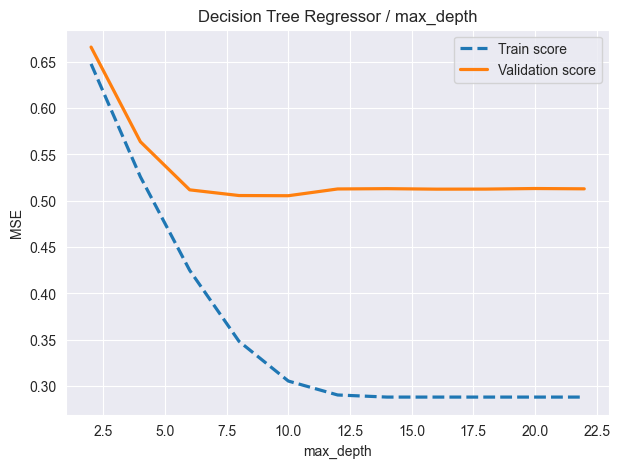

> TESTING...
MAE: 0.5588
MSE: 0.6149

\
/

TUNING & TRAINING <Random Forest Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score: {'mean_squared_error': 0.3877}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 300}
Best score: {'mean_squared_error': 0.3888}



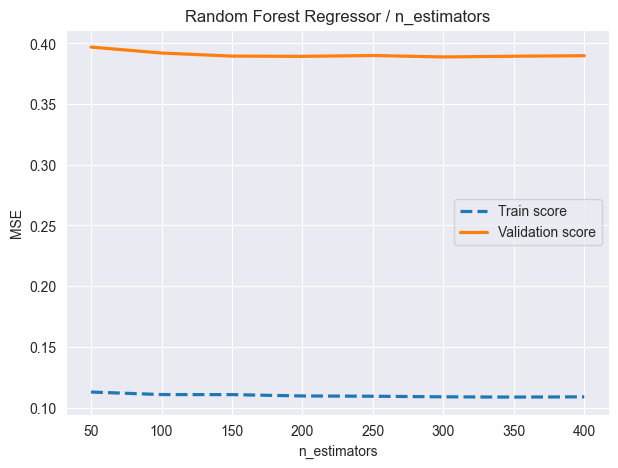

Results after max_depth tuning:
Best parameters: {'max_depth': 19}
Best score: {'mean_squared_error': 0.3888}



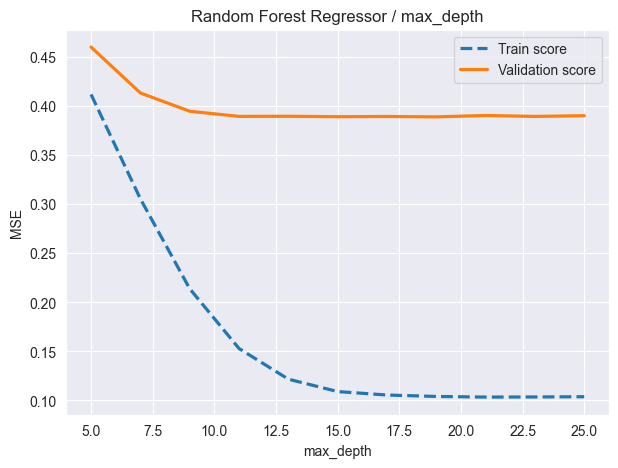

> TESTING...
MAE: 0.4739
MSE: 0.4634

\
/

TUNING & TRAINING <XGBoost Regressor>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.6}
Best score: {'mean_squared_error': 0.3702}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 200}
Best score: {'mean_squared_error': 0.3702}



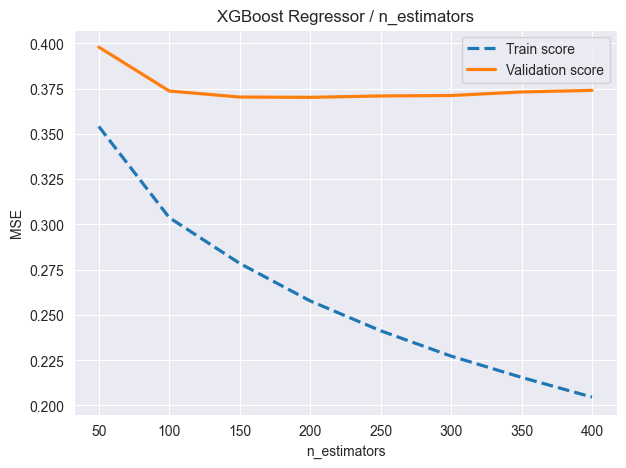

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.3748}



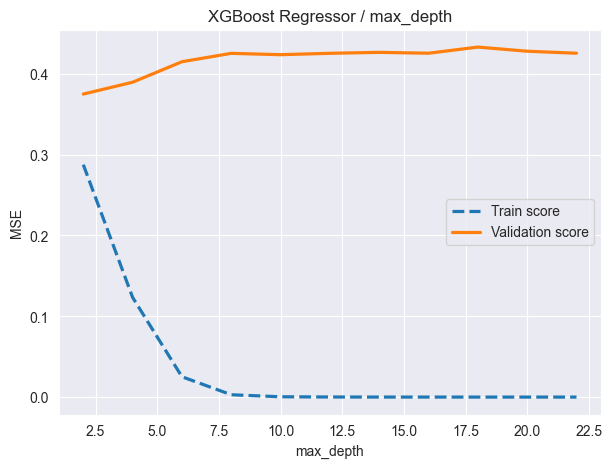

> TESTING...
MAE: 0.5056
MSE: 0.5185



In [5]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="raw")

#### Sul dataset derivato `movies_features_reg_last30.csv`

In [6]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
|   budget_efficiency   | float64 |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [7]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}

\
/

TUNING & TRAINING <Ridge Regressor>...

Results after GridSearchCV:
Best parameters: {'alpha': 0.5}
Best score: {'mean_squared_error': 0.4926}

> TESTING...
MAE: 0.5378
MSE: 0.5462

\
/

TUNING & TRAINING <Decision Tree Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best score: {'mean_squared_error': 0.5239}

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'mean_squared_error': 0.5093}



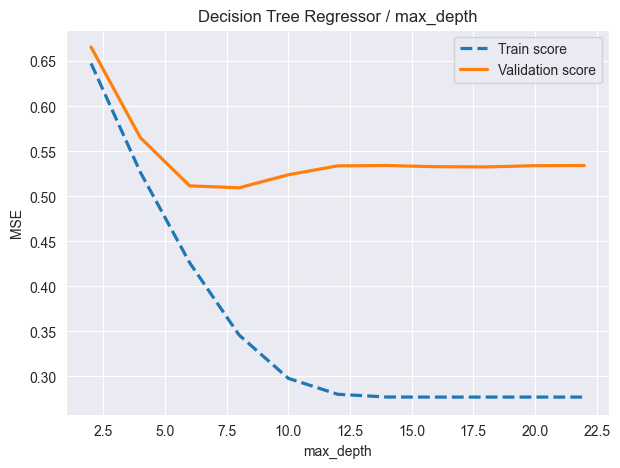

> TESTING...
MAE: 0.5911
MSE: 0.6693

\
/

TUNING & TRAINING <Random Forest Regressor>...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score: {'mean_squared_error': 0.3908}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 200}
Best score: {'mean_squared_error': 0.3905}



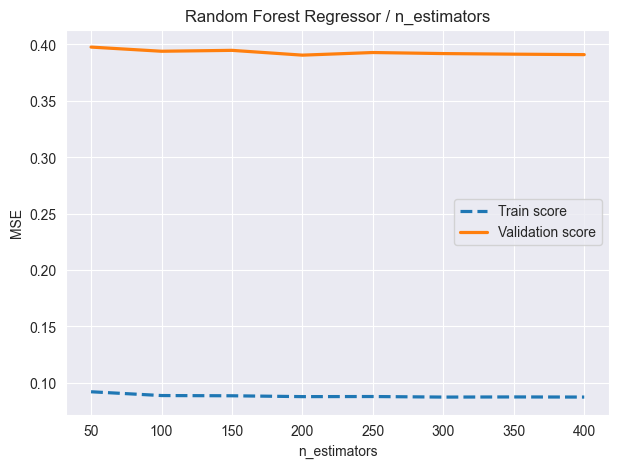

Results after max_depth tuning:
Best parameters: {'max_depth': 21}
Best score: {'mean_squared_error': 0.3901}



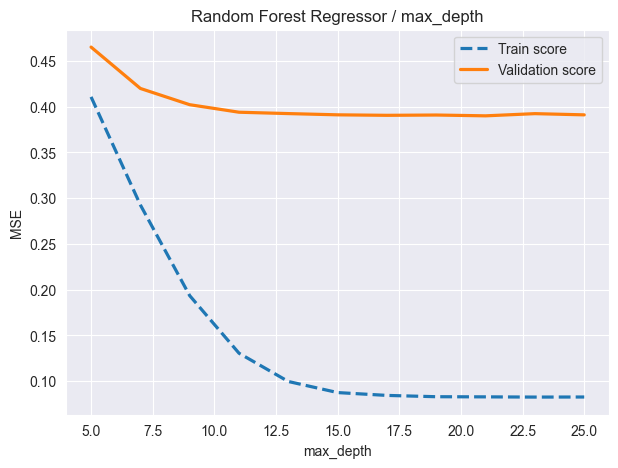

> TESTING...
MAE: 0.4824
MSE: 0.4672

\
/

TUNING & TRAINING <XGBoost Regressor>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.6}
Best score: {'mean_squared_error': 0.3729}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 250}
Best score: {'mean_squared_error': 0.3727}



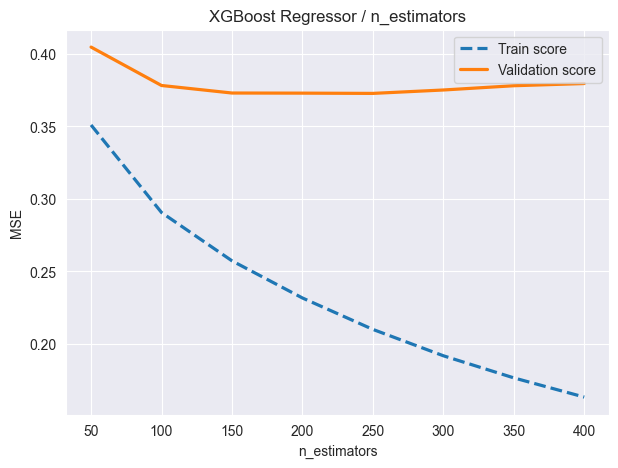

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.3758}



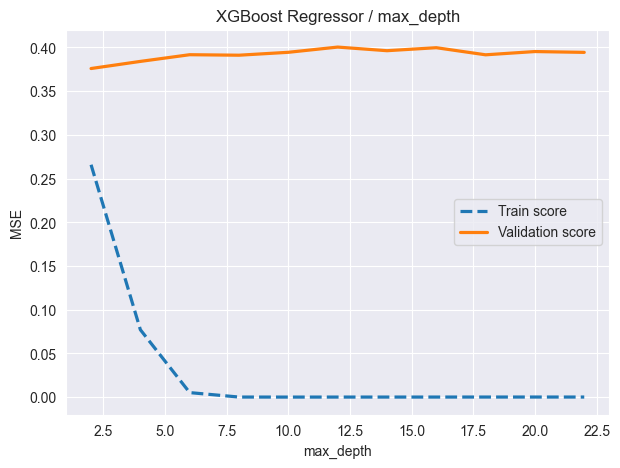

> TESTING...
MAE: 0.4819
MSE: 0.4830



In [8]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="der")

### Task di classificazione su `budget_efficiency`

#### Sul dataset iniziale `movies_adj_last30.csv`

In [9]:
adj_df = pd.read_csv("../data/movies_adj_last30.csv")
features_df = pd.read_csv("../data/movies_features_cls_last30.csv")
df = adj_df.merge(features_df[["id", "budget_efficiency_cat"]], on="id", how="left")

df = df[list(adj_df.columns) + ["budget_efficiency_cat"]]
print_info(df)

# cols: 15 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|        rating         | object  |
|         genre         | object  |
|         year          |  int64  |
|         score         | float64 |
|         votes         | float64 |
|       director        | object  |
|         star          | object  |
|        country        | object  |
|        budget         | float64 |
|         gross         | float64 |
|        company        | object  |
|        runtime        | float64 |
| budget_efficiency_cat | object  |
+-----------------------+---------+


In [10]:
# colonne per il training
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "company", "country", "director", "star", "gross"],
    "dummies": ["rating", "genre"],
    "labels": [],
    "standardize": ["runtime", "score"],
    "minmax": ["votes", "budget"]
}

\
/

TUNING & TRAINING <Logistic Regression>...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Best score: {'accuracy': 0.4623}

> TESTING...
Accuracy: 42.96%



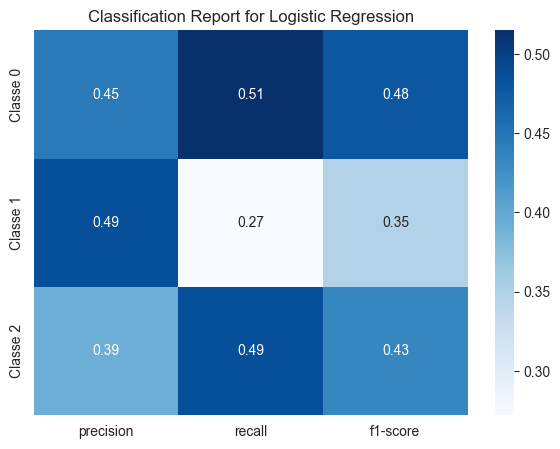

\
/

TUNING & TRAINING <Decision Tree Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 10}
Best score: {'accuracy': 0.6014}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.6075}



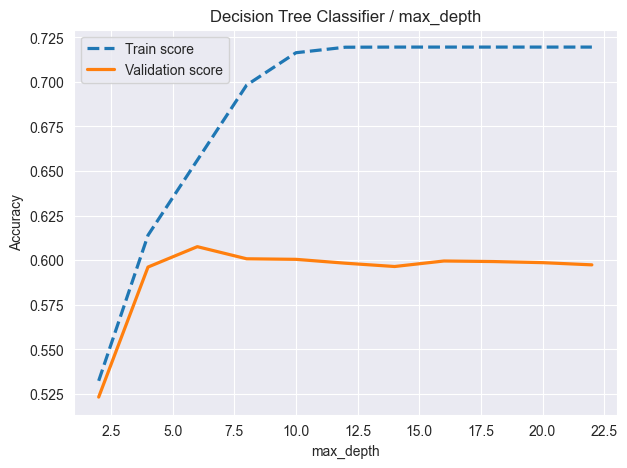

> TESTING...
Accuracy: 57.53%



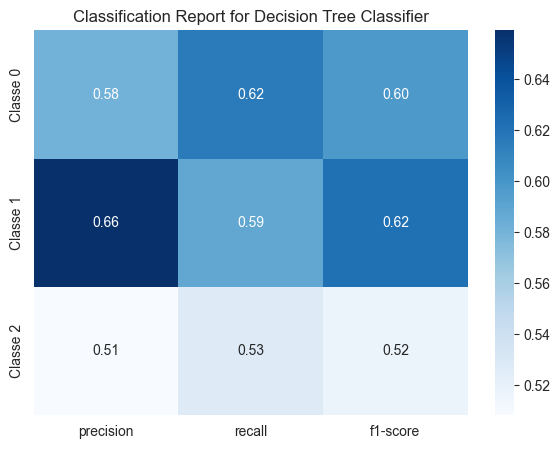

\
/

TUNING & TRAINING <Random Forest Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score: {'accuracy': 0.6363}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 400}
Best score: {'accuracy': 0.6323}



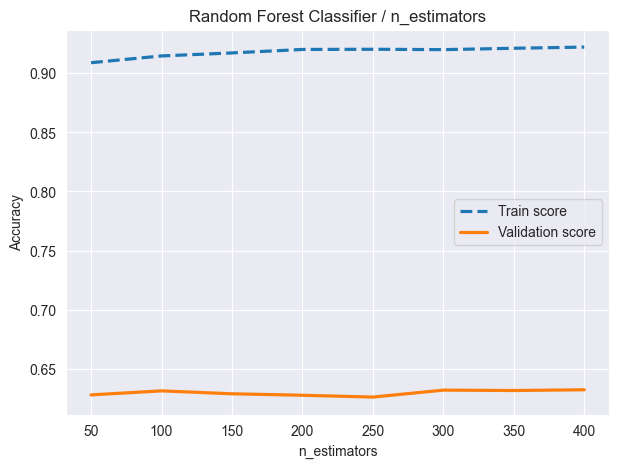

Results after max_depth tuning:
Best parameters: {'max_depth': 19}
Best score: {'accuracy': 0.6335}



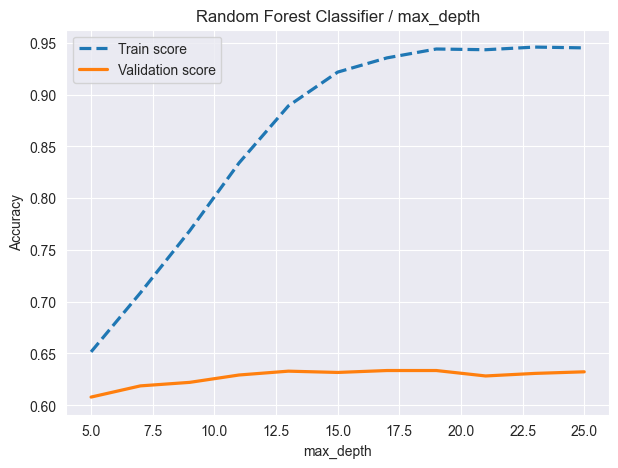

> TESTING...
Accuracy: 61.73%



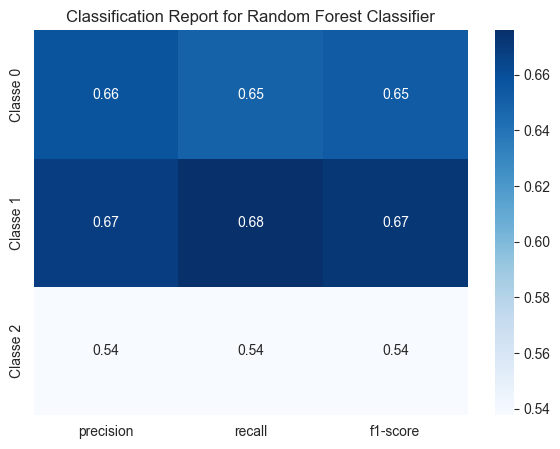

\
/

TUNING & TRAINING <XGBoost Classifier>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.6}
Best score: {'accuracy': 0.6517}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 100}
Best score: {'accuracy': 0.6517}



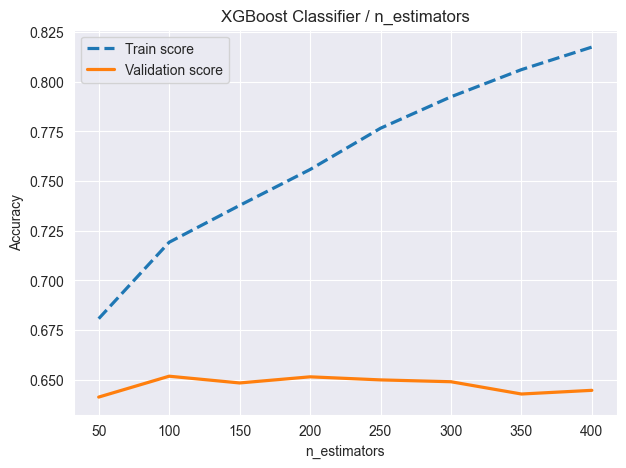

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'accuracy': 0.6474}



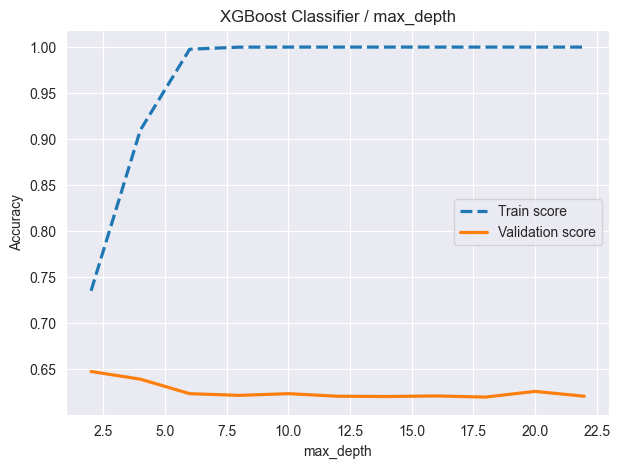

> TESTING...
Accuracy: 60.86%



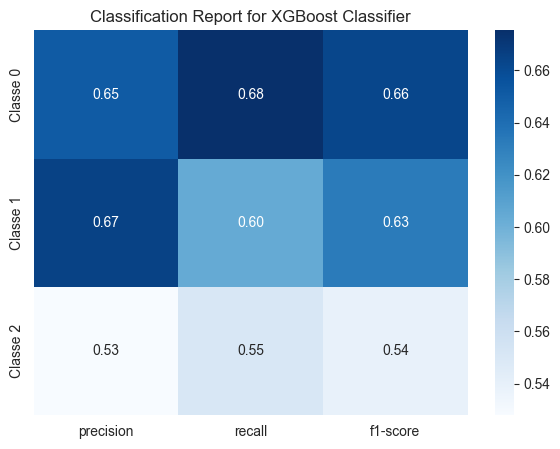

In [11]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="raw")

#### Sul dataset derivato `movies_features_cls_last30.csv`

In [12]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
print_info(df)

# cols: 20 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|          age          |  int64  |
|      rating_cat       | object  |
|       genre_cat       | object  |
|        runtime        | float64 |
|      popularity       | float64 |
|         score         | float64 |
|        budget         | float64 |
| budget_efficiency_cat | object  |
|     director_age      | float64 |
|  director_experience  |  int64  |
| director_is_acclaimed |  bool   |
|  director_is_panned   |  bool   |
|  director_efficiency  | float64 |
|       star_age        | float64 |
|    star_experience    |  int64  |
|   star_is_acclaimed   |  bool   |
|    star_is_panned     |  bool   |
|    star_efficiency    | float64 |
+-----------------------+---------+


In [13]:
# colonne per il training
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}

\
/

TUNING & TRAINING <Logistic Regression>...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}
Best score: {'accuracy': 0.6017}

> TESTING...
Accuracy: 57.53%



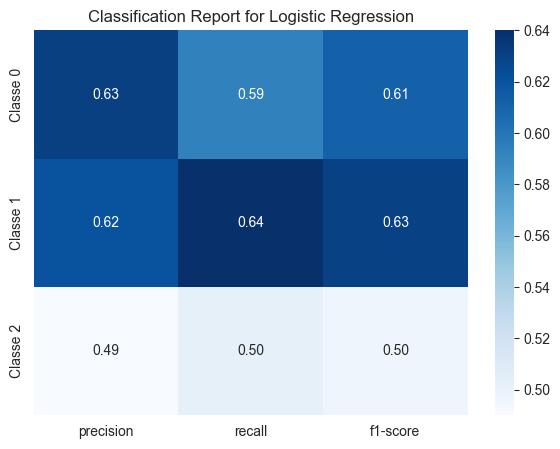

\
/

TUNING & TRAINING <Decision Tree Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: {'accuracy': 0.5946}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.5958}



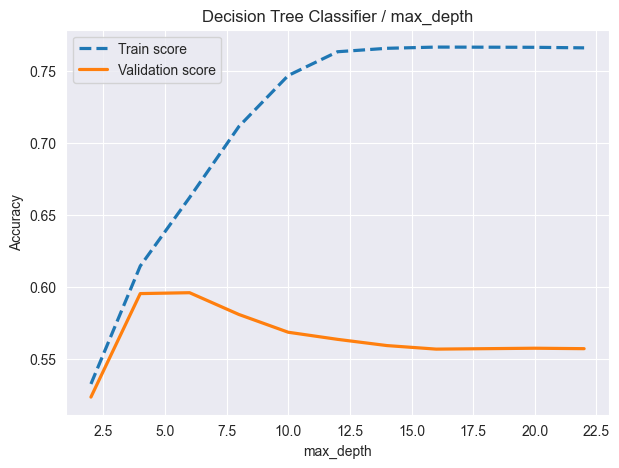

> TESTING...
Accuracy: 55.06%



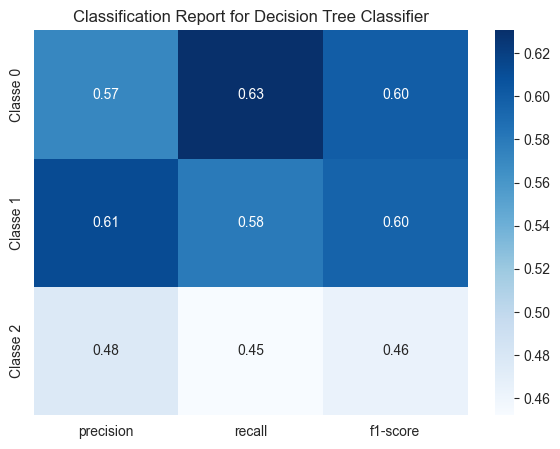

\
/

TUNING & TRAINING <Random Forest Classifier>...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score: {'accuracy': 0.6332}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 400}
Best score: {'accuracy': 0.6323}



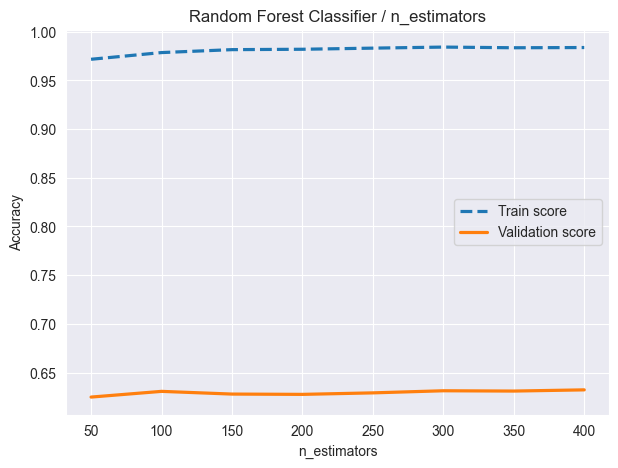

Results after max_depth tuning:
Best parameters: {'max_depth': 23}
Best score: {'accuracy': 0.6338}



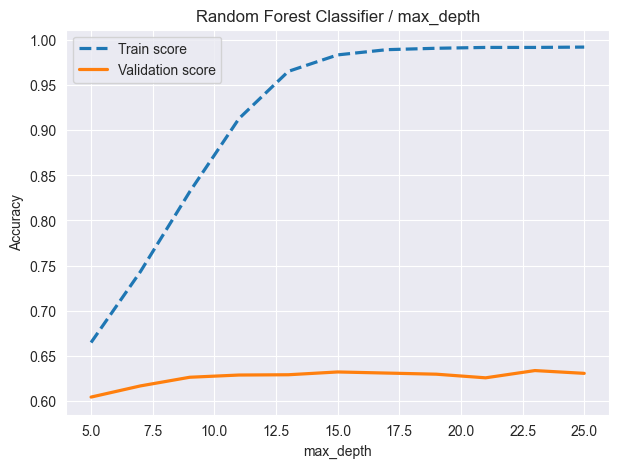

> TESTING...
Accuracy: 60.86%



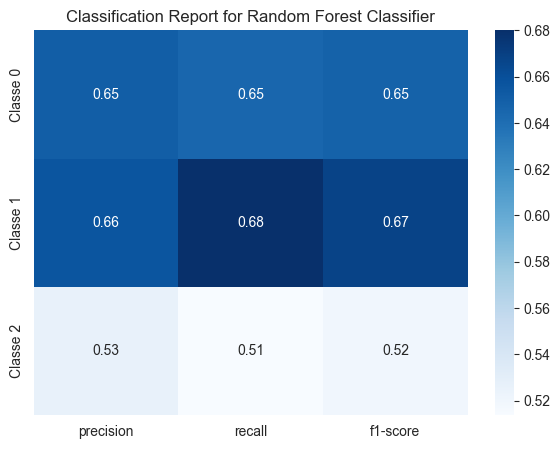

\
/

TUNING & TRAINING <XGBoost Classifier>...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
Best score: {'accuracy': 0.6539}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 100}
Best score: {'accuracy': 0.6539}



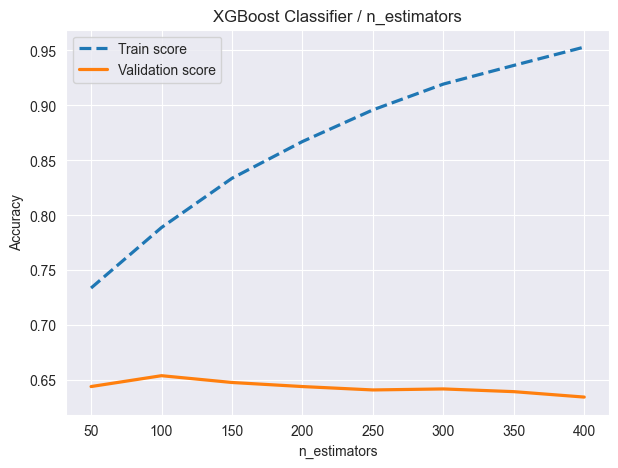

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'accuracy': 0.6502}



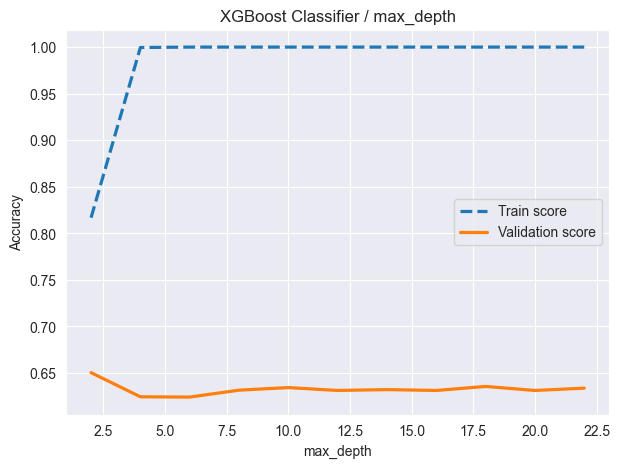

> TESTING...
Accuracy: 62.10%



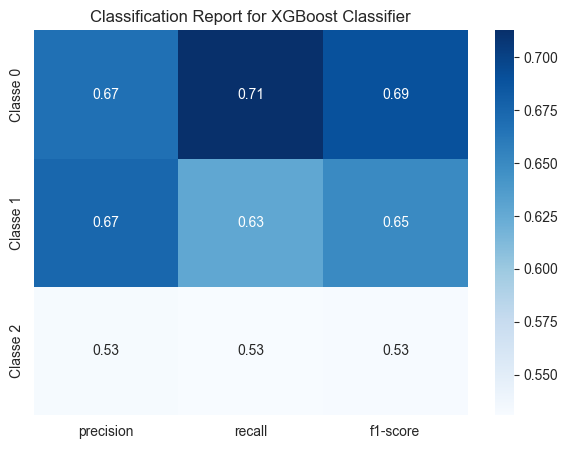

In [14]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="der")